In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Model & Tahmin

diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42)

In [3]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
y_pred = knn_model.predict(X_test)

In [5]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [6]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

   micro avg       0.69      0.69      0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



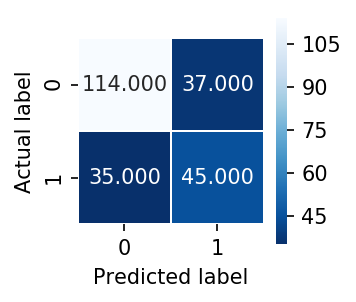

In [7]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(2,2),dpi=150) #dpi param changes the size of figure
sns.heatmap(cm, annot=True,fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',annot_kws={"size": 10});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


In [8]:
#Tuning

knn_params = {"n_neighbors":np.arange(1,50)}

In [9]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
print("En iyi skor:"+str(knn_cv.best_score_))
print("En iyi parametre:"+str(knn_cv.best_params_))

En iyi skor:0.7486033519553073
En iyi parametre:{'n_neighbors': 11}


In [13]:
knn_cv.best_params_["n_neighbors"]

11

In [16]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train,y_train)

In [17]:
knn_tuned.score(X_test,y_test)

0.7316017316017316

In [19]:
y_pred = knn_tuned.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.7316017316017316